In [4]:
import pandas as pd
import numpy as np
import matplotlib as plot
import plotly.express as px

c:\Users\vipin kumar\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\vipin kumar\miniconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\vipin kumar\miniconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [5]:
df = pd.read_csv('incidents_small.csv',parse_dates=['Date'])
df

C:\Users\vipin kumar\AppData\Local\Temp\ipykernel_12692\3580264055.py:1: DtypeWarning: Columns (1,2,3,5,6,7,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('incidents_small.csv',parse_dates=['Date'])


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272.0,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,2016-01-29,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200580e+13
1,120058272.0,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,2016-01-29,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200580e+13
2,141059263.0,WARRANTS,WARRANT ARREST,Monday,2016-04-25,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",1.410590e+13
3,160013662.0,NON-CRIMINAL,LOST PROPERTY,Tuesday,2016-01-05,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",1.600140e+13
4,160002740.0,NON-CRIMINAL,LOST PROPERTY,Friday,2016-01-01,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",1.600030e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150496,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150497,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150498,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   IncidntNum  10019 non-null  float64       
 1   Category    10019 non-null  object        
 2   Descript    10019 non-null  object        
 3   DayOfWeek   10019 non-null  object        
 4   Date        10019 non-null  datetime64[ns]
 5   Time        10019 non-null  object        
 6   PdDistrict  10019 non-null  object        
 7   Resolution  10019 non-null  object        
 8   Address     10019 non-null  object        
 9   X           10019 non-null  float64       
 10  Y           10019 non-null  float64       
 11  Location    10019 non-null  object        
 12  PdId        10019 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 14.9+ MB


In [7]:
df.dropna(inplace=True) # eliminate rows with missing values
df.shape

(10019, 13)

In [8]:
df.sort_values(by='IncidntNum', ascending=False, inplace=True)
df.head(30)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
9554,160939676.0,ASSAULT,BATTERY,Monday,2016-11-14,09:20,NORTHERN,NONE,ELLIS ST / POLK ST,-122.419366,37.784028,"(37.7840280452032, -122.419366294797)",1.609400e+13
9986,160895846.0,OTHER OFFENSES,FALSE PERSONATION,Monday,2016-10-31,10:00,MISSION,NONE,100 Block of CAPP ST,-122.418550,37.764284,"(37.7642837095036, -122.418549940195)",1.608960e+13
9964,160893652.0,NON-CRIMINAL,"CIVIL SIDEWALKS, WARNING",Wednesday,2016-11-02,18:02,MISSION,NONE,21ST ST / SHOTWELL ST,-122.415629,37.757232,"(37.757232227914, -122.415629332446)",1.608940e+13
9963,160893464.0,WEAPON LAWS,CARRYING A CONCEALED WEAPON,Wednesday,2016-11-02,16:42,BAYVIEW,NONE,1100 Block of 18TH ST,-122.394108,37.762671,"(37.7626705352496, -122.394108177688)",1.608930e+13
9962,160893395.0,ASSAULT,BATTERY,Wednesday,2016-11-02,16:15,TARAVAL,NONE,MONTEREY BL / NORTHGATE DR,-122.461737,37.730023,"(37.7300233378439, -122.461736679015)",1.608930e+13
9953,160892842.0,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,2016-11-02,10:00,MISSION,NONE,200 Block of 14TH ST,-122.418885,37.768285,"(37.7682847825555, -122.418885184858)",1.608930e+13
9952,160892836.0,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Tuesday,2016-10-18,10:00,CENTRAL,NONE,VALLEJO ST / MASON ST,-122.412099,37.798166,"(37.7981663310688, -122.412098601225)",1.608930e+13
9951,160892820.0,ASSAULT,THREATS AGAINST LIFE,Wednesday,2016-11-02,11:45,PARK,NONE,STANYAN ST / WALLER ST,-122.453355,37.768246,"(37.7682463076665, -122.453354647469)",1.608930e+13
9950,160892814.0,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,2016-11-02,12:10,BAYVIEW,"ARREST, BOOKED",QUESADA AV / 3RD ST,-122.391246,37.733225,"(37.7332252032804, -122.391245623019)",1.608930e+13
9945,160892591.0,ASSAULT,THREATS AGAINST LIFE,Wednesday,2016-11-02,10:19,BAYVIEW,NONE,0 Block of CASHMERE ST,-122.382705,37.735886,"(37.7358858148594, -122.382705072801)",1.608930e+13


In [9]:
df.sort_values(by=['Date','IncidntNum'], ascending=False, inplace=True)
df.head(30)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
2467,150273337.0,WARRANTS,WARRANT ARREST,Wednesday,2016-12-21,18:17,TENDERLOIN,"ARREST, BOOKED",300 Block of JONES ST,-122.412759,37.784400,"(37.7843997500192, -122.412758846145)",1.502730e+13
115,150480366.0,VEHICLE THEFT,STOLEN AND RECOVERED VEHICLE,Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
116,150480366.0,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
117,150480366.0,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
118,150480366.0,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
5332,160220970.0,FRAUD,"CREDIT CARD, THEFT BY USE OF",Friday,2016-11-18,12:00,BAYVIEW,NONE,1200 Block of DEHARO ST,-122.400632,37.753965,"(37.7539653995399, -122.4006319548)",1.602210e+13
9554,160939676.0,ASSAULT,BATTERY,Monday,2016-11-14,09:20,NORTHERN,NONE,ELLIS ST / POLK ST,-122.419366,37.784028,"(37.7840280452032, -122.419366294797)",1.609400e+13
9964,160893652.0,NON-CRIMINAL,"CIVIL SIDEWALKS, WARNING",Wednesday,2016-11-02,18:02,MISSION,NONE,21ST ST / SHOTWELL ST,-122.415629,37.757232,"(37.757232227914, -122.415629332446)",1.608940e+13
9963,160893464.0,WEAPON LAWS,CARRYING A CONCEALED WEAPON,Wednesday,2016-11-02,16:42,BAYVIEW,NONE,1100 Block of 18TH ST,-122.394108,37.762671,"(37.7626705352496, -122.394108177688)",1.608930e+13
9962,160893395.0,ASSAULT,BATTERY,Wednesday,2016-11-02,16:15,TARAVAL,NONE,MONTEREY BL / NORTHGATE DR,-122.461737,37.730023,"(37.7300233378439, -122.461736679015)",1.608930e+13


In [10]:
df.Category.value_counts()

LARCENY/THEFT                  1566
OTHER OFFENSES                 1476
NON-CRIMINAL                   1242
ASSAULT                        1075
WARRANTS                        555
VEHICLE THEFT                   529
VANDALISM                       475
BURGLARY                        458
SUSPICIOUS OCC                  443
DRUG/NARCOTIC                   396
MISSING PERSON                  364
ROBBERY                         268
FRAUD                           188
SECONDARY CODES                 146
TRESPASS                        146
WEAPON LAWS                     141
RECOVERED VEHICLE                77
SEX OFFENSES, FORCIBLE           74
PROSTITUTION                     59
STOLEN PROPERTY                  55
DRUNKENNESS                      51
FORGERY/COUNTERFEITING           48
DISORDERLY CONDUCT               45
DRIVING UNDER THE INFLUENCE      32
ARSON                            28
KIDNAPPING                       22
RUNAWAY                          13
BRIBERY                     

In [11]:
catagory_count = df.Category.value_counts().reset_index()
catagory_count.columns = ['Category', 'Case count']
catagory_count

,Category,Case count
0,LARCENY/THEFT,1566
1,OTHER OFFENSES,1476
2,NON-CRIMINAL,1242
3,ASSAULT,1075
4,WARRANTS,555
5,VEHICLE THEFT,529
6,VANDALISM,475
7,BURGLARY,458
8,SUSPICIOUS OCC,443
9,DRUG/NARCOTIC,396


<AxesSubplot:ylabel='Case count'>

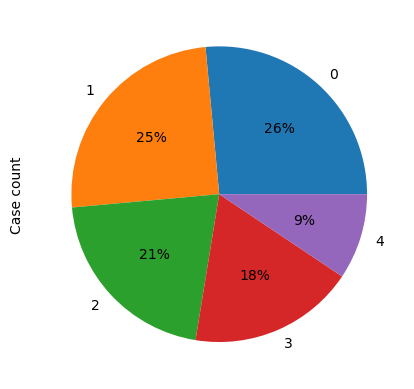

In [12]:
catagory_count['Case count'].head().plot.pie(autopct='%1.f%%',y='Category')

In [13]:
category_count_top_10 = catagory_count.head(10)
px.pie(category_count_top_10,'Category', 'Case count')

In [14]:
#find the most common way of handling incicents by the PD, in sanFransico using visulization
df.Resolution.value_counts() 

NONE                                      6390
ARREST, BOOKED                            3356
UNFOUNDED                                  159
JUVENILE BOOKED                             56
EXCEPTIONAL CLEARANCE                       28
ARREST, CITED                               18
CLEARED-CONTACT JUVENILE FOR MORE INFO       5
LOCATED                                      3
NOT PROSECUTED                               1
COMPLAINANT REFUSES TO PROSECUTE             1
PSYCHOPATHIC CASE                            1
JUVENILE DIVERTED                            1
Name: Resolution, dtype: int64

In [15]:
#df[df.Resolution == 'NONE']

In [16]:
df.Date

2467   2016-12-21
115    2016-12-08
116    2016-12-08
117    2016-12-08
118    2016-12-08
          ...    
143    2016-01-01
142    2016-01-01
132    2016-01-01
2797   2016-01-01
2796   2016-01-01
Name: Date, Length: 10019, dtype: datetime64[ns]

In [17]:
# get only november entries
df[df.Date.dt.month == 11].Category.value_counts()

ASSAULT           5
FRAUD             1
NON-CRIMINAL      1
WEAPON LAWS       1
SUSPICIOUS OCC    1
OTHER OFFENSES    1
VANDALISM         1
BURGLARY          1
WARRANTS          1
Name: Category, dtype: int64

In [18]:
df[df.Date.dt.month == 1].Category.value_counts()

LARCENY/THEFT                  346
OTHER OFFENSES                 288
NON-CRIMINAL                   238
ASSAULT                        226
VEHICLE THEFT                  120
SUSPICIOUS OCC                 110
WARRANTS                       107
BURGLARY                       105
VANDALISM                       93
MISSING PERSON                  82
DRUG/NARCOTIC                   70
ROBBERY                         58
FRAUD                           48
SECONDARY CODES                 33
TRESPASS                        32
WEAPON LAWS                     20
FORGERY/COUNTERFEITING          19
PROSTITUTION                    17
SEX OFFENSES, FORCIBLE          16
STOLEN PROPERTY                 12
RECOVERED VEHICLE               11
DRUNKENNESS                     10
DISORDERLY CONDUCT               9
DRIVING UNDER THE INFLUENCE      4
EMBEZZLEMENT                     4
KIDNAPPING                       4
RUNAWAY                          4
ARSON                            4
BRIBERY             

In [19]:
df[df.Date.dt.month == 12].Category.value_counts()

VANDALISM        2
WARRANTS         1
VEHICLE THEFT    1
DRUNKENNESS      1
Name: Category, dtype: int64

In [20]:
df.Date.dt.weekday.value_counts

<bound method IndexOpsMixin.value_counts of 2467    2
115     3
116     3
117     3
118     3
       ..
143     4
142     4
132     4
2797    4
2796    4
Name: Date, Length: 10019, dtype: int64>

##### group incident catagories by month


In [21]:
month_wise_cases=df.groupby(df.Date.dt.month)['Category'].count().reset_index()
month_wise_cases.columns =['Month', 'Case count']
month_wise_cases

,Month,Case count
0,1,2097
1,2,2387
2,3,3361
3,4,1334
4,5,82
5,6,111
6,7,149
7,8,160
8,9,138
9,10,182


In [22]:
def num_to_months(num):
    months = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'oct', 'Nov', 'Dec']
    return months[num-1]
    

In [23]:
month_wise_cases['Month'] = month_wise_cases['Month'].apply(num_to_months)

In [24]:
px.bar(month_wise_cases, 'Month', 'Case count')

In [25]:
df

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
2467,150273337.0,WARRANTS,WARRANT ARREST,Wednesday,2016-12-21,18:17,TENDERLOIN,"ARREST, BOOKED",300 Block of JONES ST,-122.412759,37.784400,"(37.7843997500192, -122.412758846145)",1.502730e+13
115,150480366.0,VEHICLE THEFT,STOLEN AND RECOVERED VEHICLE,Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
116,150480366.0,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
117,150480366.0,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
118,150480366.0,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,160000471.0,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,2016-01-01,02:04,TENDERLOIN,"ARREST, BOOKED",100 Block of TAYLOR ST,-122.410792,37.783695,"(37.7836952269749, -122.410791677645)",1.600000e+13
142,160000471.0,ASSAULT,BATTERY WITH SERIOUS INJURIES,Friday,2016-01-01,02:04,TENDERLOIN,"ARREST, BOOKED",100 Block of TAYLOR ST,-122.410792,37.783695,"(37.7836952269749, -122.410791677645)",1.600000e+13
132,160000211.0,OTHER OFFENSES,INTERFERRING WITH A POLICE OFFICER,Friday,2016-01-01,00:50,SOUTHERN,"ARREST, BOOKED",MARKET ST / BEALE ST,-122.397388,37.792405,"(37.7924047319625, -122.397387796127)",1.600000e+13
2797,151123444.0,NON-CRIMINAL,CASE CLOSURE,Friday,2016-01-01,00:01,CENTRAL,UNFOUNDED,600 Block of GEARY ST,-122.414011,37.786677,"(37.7866770011071, -122.414010814727)",1.511230e+13


#### pivot table


In [26]:
print(df.columns.to_list())

['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId']


In [27]:
df.pivot_table(index='Category', columns='Resolution', values='IncidntNum', aggfunc='count')

Resolution,"ARREST, BOOKED","ARREST, CITED",CLEARED-CONTACT JUVENILE FOR MORE INFO,COMPLAINANT REFUSES TO PROSECUTE,EXCEPTIONAL CLEARANCE,JUVENILE BOOKED,JUVENILE DIVERTED,LOCATED,NONE,NOT PROSECUTED,PSYCHOPATHIC CASE,UNFOUNDED
Category,,,,,,,,,,,,
ARSON,6.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,20.0,NaN,NaN,NaN
ASSAULT,427.0,NaN,1.0,NaN,2.0,9.0,NaN,NaN,633.0,NaN,NaN,3.0
BRIBERY,4.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN
BURGLARY,79.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,376.0,NaN,NaN,1.0
DISORDERLY CONDUCT,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,1.0
DRIVING UNDER THE INFLUENCE,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
DRUG/NARCOTIC,364.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,29.0,1.0,NaN,NaN
DRUNKENNESS,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN
EMBEZZLEMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN


In [28]:
df.pivot_table(index='Category', columns='DayOfWeek', values='IncidntNum', aggfunc='count')

DayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Category,,,,,,,
ARSON,7.0,4.0,3.0,5.0,5.0,1.0,3.0
ASSAULT,161.0,157.0,169.0,155.0,137.0,137.0,159.0
BRIBERY,2.0,1.0,2.0,3.0,NaN,2.0,3.0
BURGLARY,77.0,60.0,55.0,59.0,72.0,74.0,61.0
DISORDERLY CONDUCT,3.0,13.0,5.0,3.0,5.0,8.0,8.0
DRIVING UNDER THE INFLUENCE,6.0,2.0,13.0,3.0,7.0,NaN,1.0
DRUG/NARCOTIC,53.0,73.0,46.0,52.0,45.0,60.0,67.0
DRUNKENNESS,8.0,4.0,11.0,6.0,10.0,7.0,5.0
EMBEZZLEMENT,NaN,NaN,1.0,1.0,2.0,NaN,1.0


##### Apply a function

In [29]:
df['Category'].apply(lambda val: val.lower())

2467                  warrants
115              vehicle theft
116                drunkenness
117                  vandalism
118                  vandalism
                 ...          
143                weapon laws
142                    assault
132             other offenses
2797              non-criminal
2796    forgery/counterfeiting
Name: Category, Length: 10019, dtype: object

In [30]:
df['Category']=df['Category'].apply(lambda val: val.lower())# convert to lower case
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
2467,150273337.0,warrants,WARRANT ARREST,Wednesday,2016-12-21,18:17,TENDERLOIN,"ARREST, BOOKED",300 Block of JONES ST,-122.412759,37.784400,"(37.7843997500192, -122.412758846145)",1.502730e+13
115,150480366.0,vehicle theft,STOLEN AND RECOVERED VEHICLE,Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
116,150480366.0,drunkenness,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
117,150480366.0,vandalism,"MALICIOUS MISCHIEF, VANDALISM",Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13
118,150480366.0,vandalism,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Thursday,2016-12-08,15:00,NORTHERN,"ARREST, BOOKED",PINE ST / POLK ST,-122.420497,37.789619,"(37.789618819255, -122.42049728879)",1.504800e+13


In [31]:
tips = px.data.tips() # us restaurant tips dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
tips.total_bill - tips.tip

0      15.98
1       8.68
2      17.51
3      20.37
4      20.98
       ...  
239    23.11
240    25.18
241    20.67
242    16.07
243    15.78
Length: 244, dtype: float64

##### adding a new column (augmentation)


In [33]:
tips['food_bill'] = tips.total_bill - tips.tip
tips.head()

,total_bill,tip,sex,smoker,day,time,size,food_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98


In [34]:
tips

,total_bill,tip,sex,smoker,day,time,size,food_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,23.11
240,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.67
242,17.82,1.75,Male,No,Sat,Dinner,2,16.07


In [35]:
tips.sort_values(by='food_bill', ascending=False, inplace=True) # sort the values
tips.head()

,total_bill,tip,sex,smoker,day,time,size,food_bill
156,48.17,5.00,Male,No,Sun,Dinner,6,43.17
182,45.35,3.50,Male,Yes,Sun,Dinner,3,41.85
102,44.30,2.50,Female,Yes,Sat,Dinner,3,41.80
59,48.27,6.73,Male,No,Sat,Dinner,4,41.54
170,50.81,10.00,Male,Yes,Sat,Dinner,3,40.81


In [36]:
tips.pivot_table(index='day', columns='sex', values='food_bill', aggfunc=['max', 'min'])

max           min      
sex  Female   Male Female  Male
day                            
Fri   19.50  35.44   4.75  6.66
Sat   41.80  41.54   2.07  6.30
Sun   30.26  43.17   5.60  2.10
Thur  38.11  36.19   6.85  5.51

##### general syntax for plotly express 

px.func(dataframe, colname, colname2, othersettings)

In [37]:
px.bar(tips.head(10),['total_bill', 'food_bill'])

In [38]:
tips.total_bill.max

<bound method NDFrame._add_numeric_operations.<locals>.max of 156    48.17
182    45.35
102    44.30
59     48.27
170    50.81
       ...  
178     9.60
149     7.51
92      5.75
172     7.25
67      3.07
Name: total_bill, Length: 244, dtype: float64>

In [39]:
tips.total_bill.min

<bound method NDFrame._add_numeric_operations.<locals>.min of 156    48.17
182    45.35
102    44.30
59     48.27
170    50.81
       ...  
178     9.60
149     7.51
92      5.75
172     7.25
67      3.07
Name: total_bill, Length: 244, dtype: float64>

In [40]:
tips[(tips.total_bill < 40) & (tips.total_bill > 5)] 

,total_bill,tip,sex,smoker,day,time,size,food_bill
207,38.73,3.00,Male,Yes,Sat,Dinner,4,35.73
56,38.01,3.00,Male,Yes,Sat,Dinner,4,35.01
112,38.07,4.00,Male,No,Sun,Dinner,3,34.07
23,39.42,7.58,Male,No,Sat,Dinner,4,31.84
237,32.83,1.17,Male,Yes,Sat,Dinner,2,31.66
...,...,...,...,...,...,...,...,...
195,7.56,1.44,Male,No,Thur,Lunch,2,6.12
178,9.60,4.00,Female,Yes,Sun,Dinner,2,5.60
149,7.51,2.00,Male,No,Thur,Lunch,2,5.51
92,5.75,1.00,Female,Yes,Fri,Dinner,2,4.75


In [41]:
px.box(tips, 'total_bill')

In [42]:
px.box(tips, 'total_bill', color='sex')

In [43]:
px.box(tips, 'total_bill', color='day')

In [44]:
px.box(tips, 'total_bill', color='time')

In [45]:
px.box(tips, 'total_bill', color='smoker')

In [46]:
px.box(tips, 'total_bill', color='sex')

In [47]:
px.violin(tips, 'tip', color='sex')

In [48]:
px.scatter(tips, 'total_bill', 'tip', color='sex', facet_col='day')

In [49]:
px.scatter(tips, 'total_bill', 'tip', color='sex', facet_col='day', trendline='ols')

ImportError: The `scipy` install you are using seems to be broken, (extension modules cannot be imported), please try reinstalling.

In [ ]:
df = px.data.gapminder()
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [ ]:
df.country.unique() # to print the country name or unique value

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [ ]:
df = px.data.gapminder()

In [ ]:
dfc = df[df.country == 'india']

In [ ]:
px.bar(dfc, 'year', 'lifeExp', title='Indias Life Expectancy' )

In [ ]:
px.funnel(dfc,'year', 'lifeExp', title='Indias Life Expectancy')

In [ ]:
px.scatter_3d(df, x='year', y = 'lifeExp',z = 'pop', hover_data=['country'], size='pop')

In [ ]:
px.scatter(df, x='year', y = 'lifeExp',
          hover_data=['country'], color='continent', size='pop',
         animation_frame='year', animation_group='country',)

In [ ]:
continent=df.groupby(['continent', 'year']).mean().reset_index()
continent

C:\Users\vipin kumar\AppData\Local\Temp\ipykernel_10260\3737739552.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,continent,year,lifeExp,pop,gdpPercap,iso_num
0,Africa,1952,39.135500,4.570010e+06,1252.572466,458.826923
1,Africa,1957,41.266346,5.093033e+06,1385.236062,458.826923
2,Africa,1962,43.319442,5.702247e+06,1598.078825,458.826923
3,Africa,1967,45.334538,6.447875e+06,2050.363801,458.826923
4,Africa,1972,47.450942,7.305376e+06,2339.615674,458.826923
5,Africa,1977,49.580423,8.328097e+06,2585.938508,458.826923
6,Africa,1982,51.592865,9.602857e+06,2481.592960,458.826923
7,Africa,1987,53.344788,1.105450e+07,2282.668991,458.826923
8,Africa,1992,53.629577,1.267464e+07,2281.810333,458.826923
9,Africa,1997,53.598269,1.430448e+07,2378.759555,458.826923


In [ ]:
px.sunburst(df, path=['continent', 'country','year'], values='pop')

NameError: name 'px' is not defined

In [ ]:
px.icicle(df, path=['continent', 'country','year'], values='pop')

NameError: name 'px' is not defined